# exmaine the `london` mocks
documentation for the mocks can be found in https://desi.lbl.gov/trac/wiki/LymanAlphaWG/LondonMocks. The spectra is generated using https://desi.lbl.gov/trac/wiki/LymanAlphaWG/LyaSpecSim/quickquasars More details here: https://desi.lbl.gov/trac/wiki/LymanAlphaWG/LyaSpecSim

In [1]:
import os
import numpy as np 

In [2]:
import astropy.io.fits as fits
from astropy.table import Table

In [38]:
import matplotlib.pyplot as plt

In [13]:
# three files in each spectra directory...
fspec = '/global/cfs/cdirs/desicollab/mocks/lya_forest/develop/london/qq_desi/v9.0_Y1/v9.0.9.9.9/desi-4.124-4-prod/spectra-16/0/0/spectra-16-0.fits'
ftrue = '/global/cfs/cdirs/desicollab/mocks/lya_forest/develop/london/qq_desi/v9.0_Y1/v9.0.9.9.9/desi-4.124-4-prod/spectra-16/0/0/truth-16-0.fits'
frred = '/global/cfs/cdirs/desicollab/mocks/lya_forest/develop/london/qq_desi/v9.0_Y1/v9.0.9.9.9/desi-4.124-4-prod/spectra-16/0/0/zbest-16-0.fits'

In [10]:
meta = Table.read(fspec) # meta data on each QSO 
hdulist = fits.open(fspec) 

In [128]:
truth = Table.read(ftrue, hdu=1)
zbest = Table.read(frred, hdu=1)
# truth['Z'] is equivalent to zbest['Z'] 

true_bal = Table.read(ftrue, hdu=2)
true_cont = Table.read(ftrue, hdu=5)
w_true = np.linspace(3.5e3, 1e4, 3251) # THIS IS A GUESS BY EYE!!

In [146]:
for h in hdulist[2:]:
    print(h.header['EXTNAME'])

B_WAVELENGTH
B_FLUX
B_IVAR
B_MASK
R_WAVELENGTH
R_FLUX
R_IVAR
R_MASK
Z_WAVELENGTH
Z_FLUX
Z_IVAR
Z_MASK


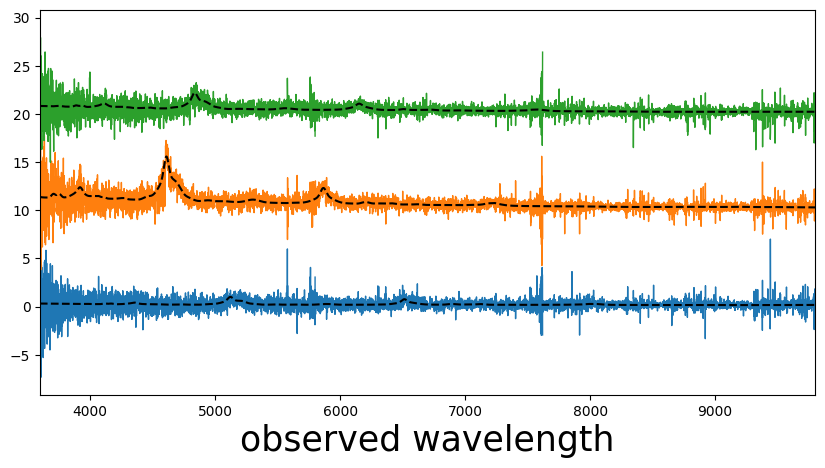

In [131]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
for igal in range(3): 
    offset = igal * 10
    sub.plot(hdulist[2].data, hdulist[3].data[igal] + offset, lw=1, c='C%i' % igal)
    sub.plot(hdulist[6].data, hdulist[7].data[igal] + offset, lw=1, c='C%i' % igal)
    sub.plot(hdulist[10].data, hdulist[11].data[igal] + offset, lw=1, c='C%i' % igal)
    
    sub.plot(w_true, true_cont['TRUE_CONT'][igal] + offset, c='k', ls='--')
sub.set_xlim(3.6e3, 9.8e3)
sub.set_xlabel('observed wavelength', fontsize=25)
plt.show()    

In [132]:
meta

TARGETID,PETAL_LOC,DEVICE_LOC,LOCATION,FIBER,FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,LAMBDA_REF,FA_TARGET,FA_TYPE,OBJTYPE,FIBERASSIGN_X,FIBERASSIGN_Y,PRIORITY,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKNAME,BRICKID,BRICK_OBJID,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,MASKBITS,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,DESI_TARGET,BGS_TARGET,MWS_TARGET,SCND_TARGET,PLATE_RA,PLATE_DEC,NUM_ITER,FIBER_X,FIBER_Y,DELTA_X,DELTA_Y,FIBER_RA,FIBER_DEC,EXPTIME,NIGHT,EXPID,TILEID
int64,int16,int32,int64,int32,int32,float32,float32,float32,float32,float32,float32,int64,uint8,bytes3,float32,float32,int32,float64,int32,int16,bytes8,int64,int64,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,int64,bytes2,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,float64,float64,int64,float64,float64,float64,float64,float32,float32,float64,int32,int32,int32
58959,0,311,311,0,0,46.048996,3.8669515,0.0,0.0,0.0,5400.0,0,0,--,83.25502,-286.62833,0,0.0,0,0,--,0,0,--,0.001,0.57692075,0.9743019,1.2573433,5.6865435,7.5376673,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,--,0.0,0.0,0.0,0.0,S,0,0,4,0,0,0,0.0,0.0,2,0.0,0.0,0.0,0.0,46.048996,3.8669515,0.0,20231202,0,0
59236,0,272,272,1,0,44.989815,4.128267,0.0,0.0,0.0,5400.0,0,0,--,59.154762,-273.22592,0,0.0,0,0,--,0,0,--,0.001,2.6985672,2.8097358,2.5715575,3.3073661,5.6664453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,--,0.0,0.0,0.0,0.0,S,0,0,4,0,0,0,0.0,0.0,2,0.0,0.0,0.0,0.0,44.989815,4.128267,0.0,20231202,0,0
59240,0,252,252,2,0,45.728325,4.02753,0.0,0.0,0.0,5400.0,0,0,--,31.839388,-269.74557,0,0.0,0,0,--,0,0,--,0.001,1.379539,1.7204086,1.7549793,2.4277694,3.570529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,--,0.0,0.0,0.0,0.0,S,0,0,4,0,0,0,0.0,0.0,2,0.0,0.0,0.0,0.0,45.728325,4.02753,0.0,20231202,0,0
60107,0,156,156,3,0,45.499645,4.2197313,0.0,0.0,0.0,5400.0,0,0,--,0.23776199,-221.12386,0,0.0,0,0,--,0,0,--,0.001,0.669877,1.2607696,2.3038332,12.632033,18.296892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,--,0.0,0.0,0.0,0.0,S,0,0,4,0,0,0,0.0,0.0,2,0.0,0.0,0.0,0.0,45.499645,4.2197313,0.0,20231202,0,0
60115,0,198,198,4,0,45.788837,4.018457,0.0,0.0,0.0,5400.0,0,0,--,-19.733147,-252.98328,0,0.0,0,0,--,0,0,--,0.001,1.2457057,1.5301136,1.2341743,1.4035342,2.0073948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,--,0.0,0.0,0.0,0.0,S,0,0,4,0,0,0,0.0,0.0,2,0.0,0.0,0.0,0.0,45.788837,4.018457,0.0,20231202,0,0
60396,0,204,204,5,0,44.74676,4.4831376,0.0,0.0,0.0,5400.0,0,0,--,41.534225,-240.07207,0,0.0,0,0,--,0,0,--,0.001,1.3640985,1.4172027,2.072143,3.3468,4.8993387,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,--,0.0,0.0,0.0,0.0,S,0,0,4,0,0,0,0.0,0.0,2,0.0,0.0,0.0,0.0,44.74676,4.4831376,0.0,20231202,0,0
60409,0,233,233,6,0,44.917774,4.2713213,0.0,0.0,0.0,5400.0,0,0,--,14.635101,-264.14224,0,0.0,0,0,--,0,0,--,0.001,4.254656,3.4845517,2.3774943,1.089798,1.6508771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,--,0.0,0.0,0.0,0.0,S,0,0,4,0,0,0,0.0,0.0,2,0.0,0.0,0.0,0.0,44.917774,4.2713213,0.0,20231202,0,0
60683,0,172,172,7,0,45.047474,4.6771264,0.0,0.0,0.0,5400.0,0,0,--,17.43013,-226.72704,0,0.0,0,0,--,0,0,--,0.001,2.0277894,2.384479,3.9539242,8.474344,14.119239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,--,0.0,0.0,0.0,0.0,S,0,0,4,0,0,0,0.0,0.0,2,0.0,0.0,0.0,0.0,45.047474,4.6771264,0.0,20231202,0,0
60693,0,310,310,8,0,45.25099,4.42131,0.0,0.0,0.0,5400.0,0,0,--,73.06796,-288.78616,0,0.0,0,0,--,0,0,--,0.001,1.7058556,4.399269,10.621775,86.91402,131.80731,0.